## SEAI 2022 - Python - Lab 1
# Intro to Python 

Vincenzo Nardelli - Niccolò Salvini

# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
breast_cancer = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


* **WDBC-Malignant => 1 = Positive class**
* **WDBC-Benign => 0 = Negative class**

Logistic Regression
* **radius_se** standard error of the tumor radius
* **worst concave points** number of concave portions of the contour

In [5]:
X = breast_cancer[["radius error","worst concave points"]].values
Y = breast_cancer['target'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

## Docs
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [6]:
ss = StandardScaler() # docs first link
X_train = X_train
X_test = X_test

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, Y_train)

/Users/vincenzonardelli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

* **Accuracy** It counts the number of correct predictions of the model (True-Positive), it returns a number 0 < number < 1. The **more**, the better 
* **Negative Log-likelihood (log loss)** It accounts probabilities,  it returns a number 0 < number < 1. The **less**, the better 



In [8]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import log_loss 

Y_pred = lr.predict(X_test)
Y_pred_proba = lr.predict_proba(X_test)

print("ACCURACY: "+str(accuracy_score(Y_test, Y_pred)))
print("LOG LOSS: "+str(log_loss(Y_test, Y_pred_proba)))

ACCURACY: 0.8304093567251462
LOG LOSS: 0.39495255809263713


In [9]:
print(Y_pred_proba)

[[0.48049291 0.51950709]
 [0.16098853 0.83901147]
 [0.18048791 0.81951209]
 [0.18630574 0.81369426]
 [0.14012046 0.85987954]
 [0.20373284 0.79626716]
 [0.13979443 0.86020557]
 [0.13145755 0.86854245]
 [0.23738228 0.76261772]
 [0.24108096 0.75891904]
 [0.54248162 0.45751838]
 [0.30058688 0.69941312]
 [0.09621443 0.90378557]
 [0.43181592 0.56818408]
 [0.53853206 0.46146794]
 [0.48751422 0.51248578]
 [0.45356566 0.54643434]
 [0.57339167 0.42660833]
 [0.69619633 0.30380367]
 [0.94233459 0.05766541]
 [0.52366074 0.47633926]
 [0.32800957 0.67199043]
 [0.18059206 0.81940794]
 [0.17634208 0.82365792]
 [0.41365197 0.58634803]
 [0.19717269 0.80282731]
 [0.1956882  0.8043118 ]
 [0.30426111 0.69573889]
 [0.1378228  0.8621772 ]
 [0.74786058 0.25213942]
 [0.20122089 0.79877911]
 [0.63068804 0.36931196]
 [0.29644055 0.70355945]
 [0.43749399 0.56250601]
 [0.11954532 0.88045468]
 [0.47893233 0.52106767]
 [0.25433305 0.74566695]
 [0.70900572 0.29099428]
 [0.24704174 0.75295826]
 [0.70624895 0.29375105]


In [10]:
confusion_matrix(Y_test, Y_pred)

array([[ 39,  24],
       [  5, 103]])

## Docs

https://en.wikipedia.org/wiki/Confusion_matrix

In [11]:
def showBounds(model, X, Y, labels=["Negativo","Positivo"]):
    
    h = .02 

    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[Y==1]
    X_b = X[Y==0]
    plt.scatter(X_b[:, 0], X_b[:, 1], c="green",  edgecolor='white', label=labels[0])
    plt.scatter(X_m[:, 0], X_m[:, 1], c="red",  edgecolor='white', label=labels[1])
    plt.legend()

We can obtain the decision boundary on the training set by using the user defined function `showBounds()` 

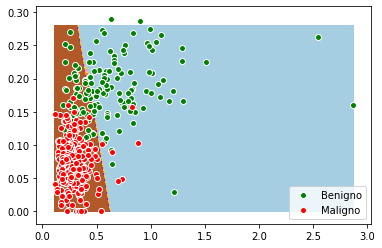

In [12]:
showBounds(lr, X_train, Y_train, labels=["Benigno","Maligno"])

... And then on the test set



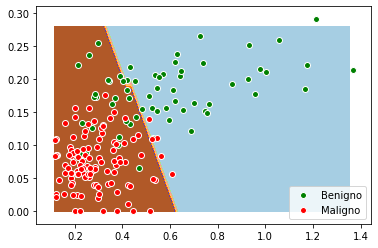

In [13]:
showBounds(lr, X_test, Y_test, labels=["Benigno","Maligno"])

## Full Logistic Regression (all the features in the model)

In this case we will try to add to the linear predictor all the features available in the dataset


In [14]:
X = breast_cancer.drop('target',axis=1).values
Y = breast_cancer['target'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, Y_train)

/Users/vincenzonardelli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
Y_pred = lr.predict(X_test)
Y_pred_proba = lr.predict_proba(X_test)

print("ACCURACY: "+str(accuracy_score(Y_test, Y_pred)))
print("LOG LOSS: "+str(log_loss(Y_test, Y_pred_proba)))

ACCURACY: 0.9766081871345029
LOG LOSS: 0.0893719480342204


In [16]:
confusion_matrix(Y_test, Y_pred)

array([[ 60,   3],
       [  1, 107]])